In [1]:
#!pip install nibabel
#!pip install nilearn
#!pip install -U seaborn-image

In [1]:
import nibabel as nb
from nilearn import plotting as plot
from nilearn import image as img
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as nd
from scipy import stats

In [2]:
df = pd.read_excel("ATR_GT_Training_og.xlsx",header = None, names=['File Name','Label'])
df['File Name'] = df['File Name'].map(lambda x: x.lstrip("'").rstrip("'"))
df['Image'] = df['File Name'].map(lambda x: nb.load('ATR_data/' + str(x) + '.nii.gz'))
df['Image'][401].shape
df


,File Name,Label,Image
0,I004_1,0.0,\n<class 'nibabel.nifti1.Nifti1Image'>\ndata s...
1,I004_2,0.0,\n<class 'nibabel.nifti1.Nifti1Image'>\ndata s...
2,I004_3,1.0,\n<class 'nibabel.nifti1.Nifti1Image'>\ndata s...
3,I005_1,0.0,\n<class 'nibabel.nifti1.Nifti1Image'>\ndata s...
4,I005_2,0.0,\n<class 'nibabel.nifti1.Nifti1Image'>\ndata s...
...,...,...,...
1467,I193_18,NaN,\n<class 'nibabel.nifti1.Nifti1Image'>\ndata s...
1468,I193_19,NaN,\n<class 'nibabel.nifti1.Nifti1Image'>\ndata s...
1469,I193_20,NaN,\n<class 'nibabel.nifti1.Nifti1Image'>\ndata s...
1470,I193_21,NaN,\n<class 'nibabel.nifti1.Nifti1Image'>\ndata s...


(244, 30, 207) (244, 30)


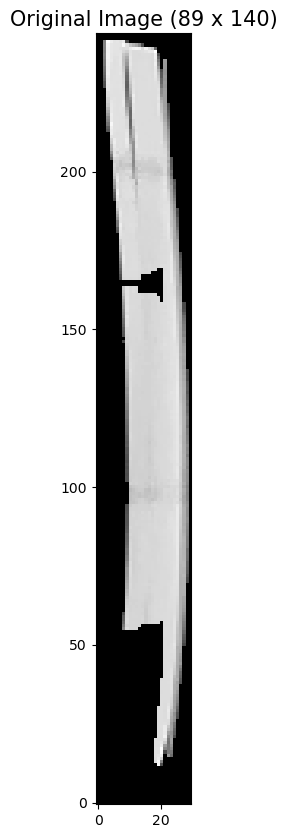

In [22]:
#Gets the first image of the data
data = df['Image'][12].get_fdata()
#Show the 25th slice of the first image
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.imshow(data[:,:,100], cmap='gray')
ax1.set_title('Original Image (89 x 140)')

#The shape of the first image
shape = data.shape
#The shape(dimensions) of the 25th slice in the first image
first_slice_shape = data[:,:,25].shape
print(shape,first_slice_shape)

(64, 120)


Text(0.5, 1.0, 'Resized Image (64 x 128)')

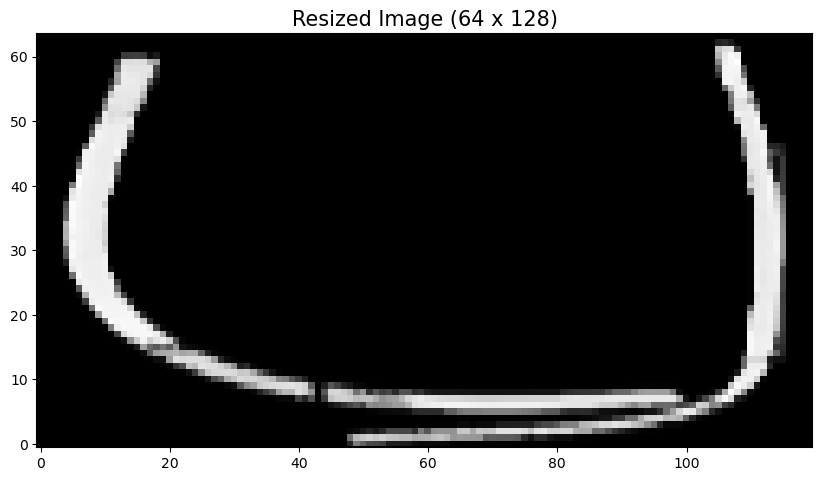

In [15]:
from skimage.transform import resize
#The 25th slice of the first image
first_img_25 = data[:,:,25]

#First resize the image dimnsions to (64x128) to make calulations simple in feature extraction
#We will need to divide thr image into (8x8) and (16x16) patches to extract the features
fig, ax2 = plt.subplots(figsize=(10,10))
resized = resize(first_img_25,(64,120))
print(resized.shape)

ax2.imshow(resized, cmap='gray')
ax2.set_title('Resized Image (64 x 128)')

Text(0.5, 1.0, 'Histogram of Orientated Gradients')

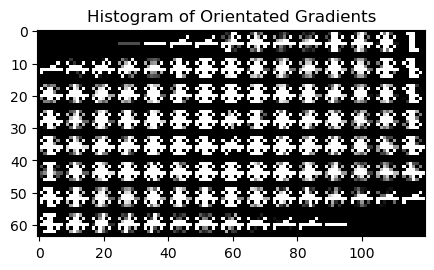

In [6]:
#Now we can import the HOG(Histogram of Orientated Gradients) library to extract features
#The HOG is a feature descriptor which creates histograms using gradients and orientation
from skimage.feature import hog
from skimage import exposure
fd, hog_img = hog(resized,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize = True)
fd.shape

hog_image_rescaled = exposure.rescale_intensity(hog_img, in_range=(0,10))
fig, ax3 = plt.subplots(figsize=(5,5),sharex=True,sharey=True)
ax3.imshow(hog_image_rescaled, cmap = plt.cm.gray)
ax3.set_title('Histogram of Orientated Gradients')


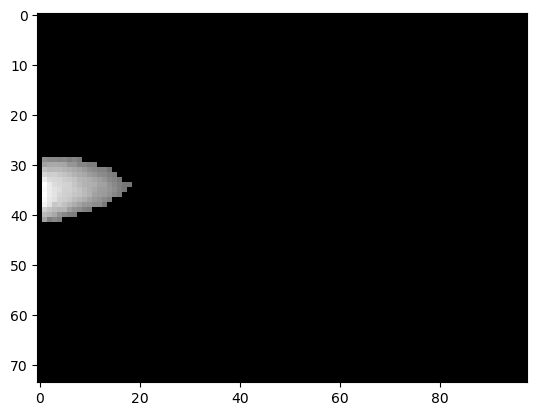

0


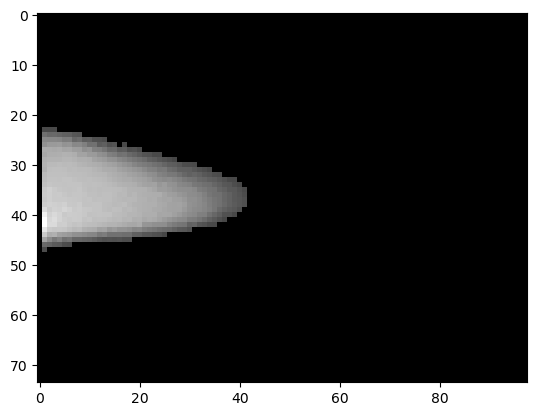

1


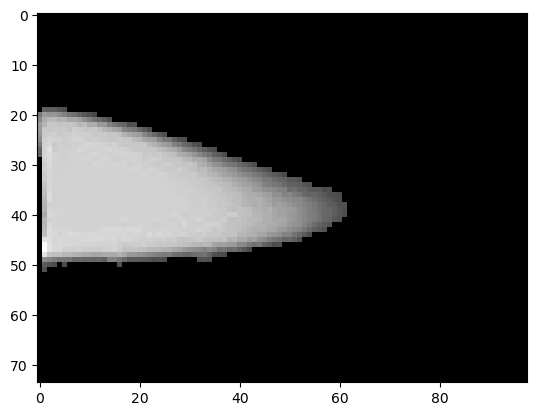

2


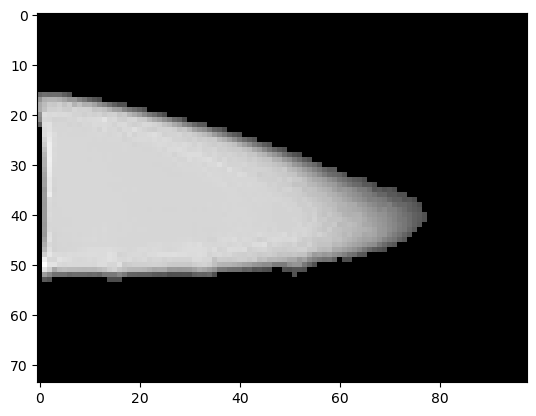

3


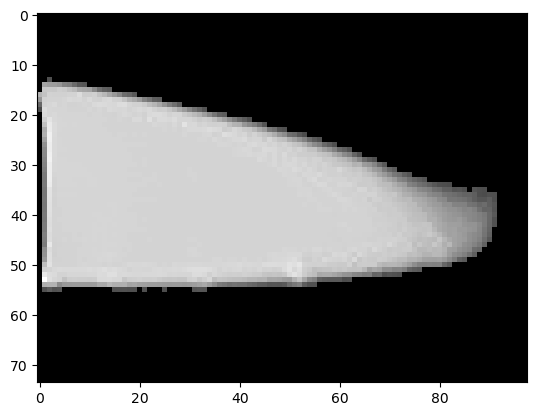

4


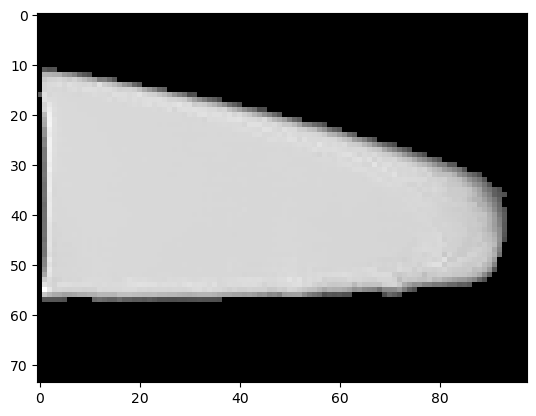

5


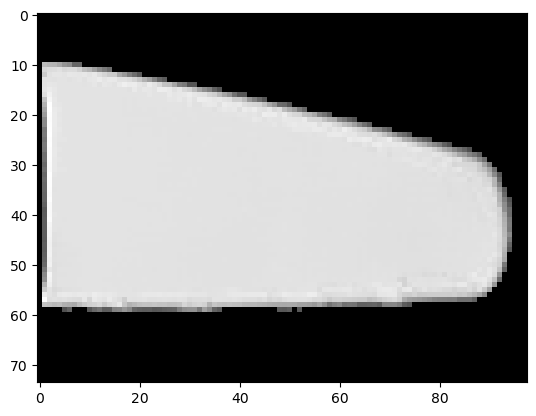

6


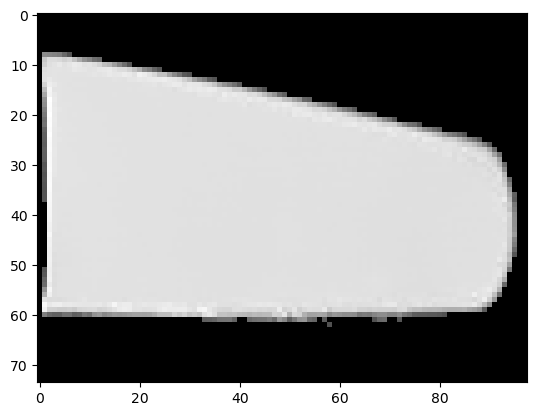

7


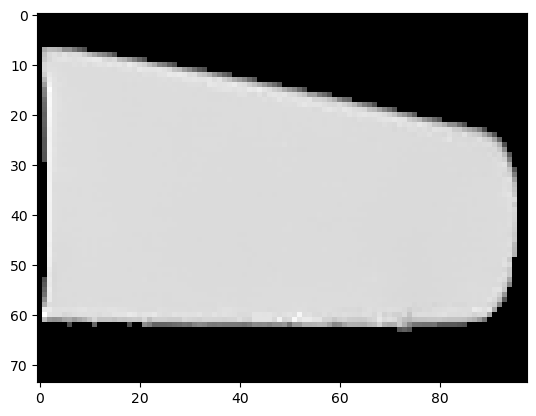

8


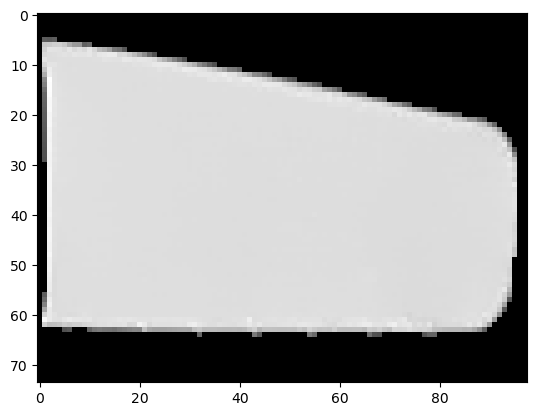

9


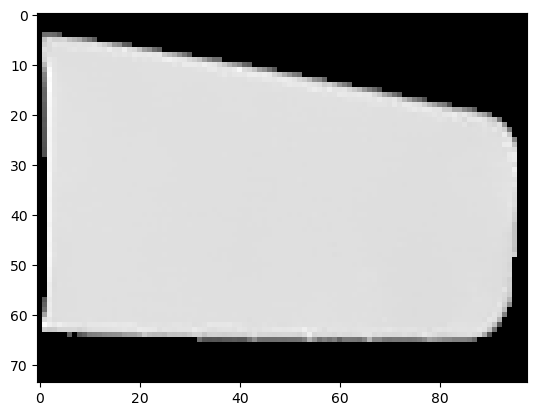

10


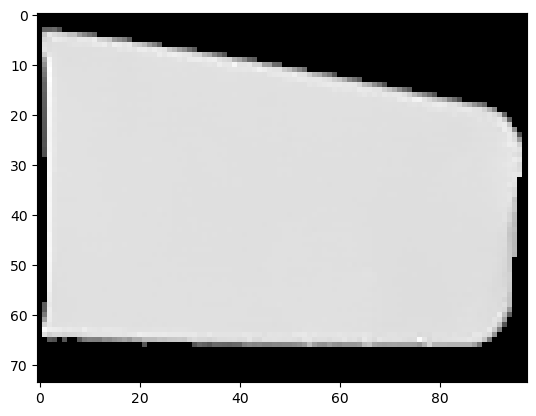

11


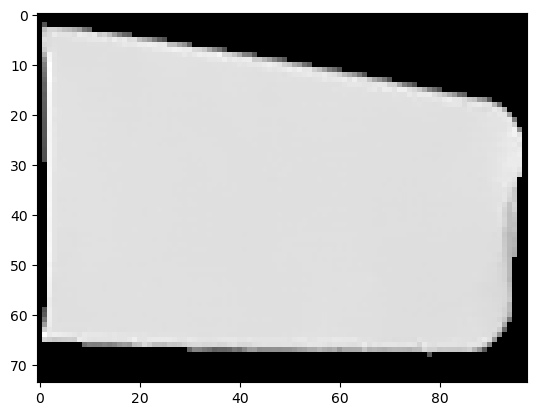

12


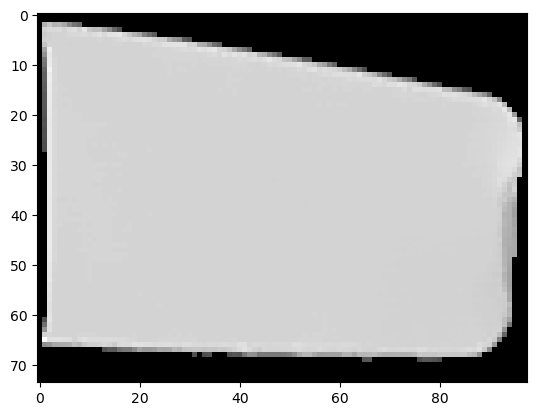

13


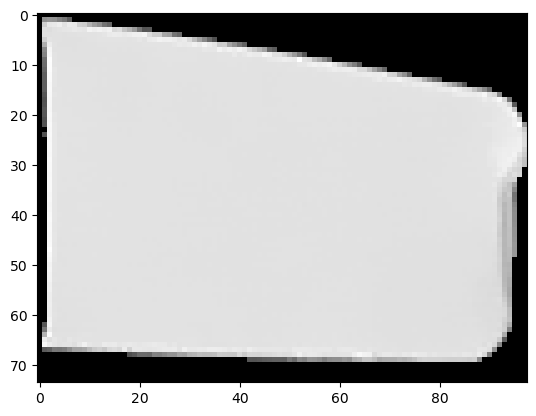

14


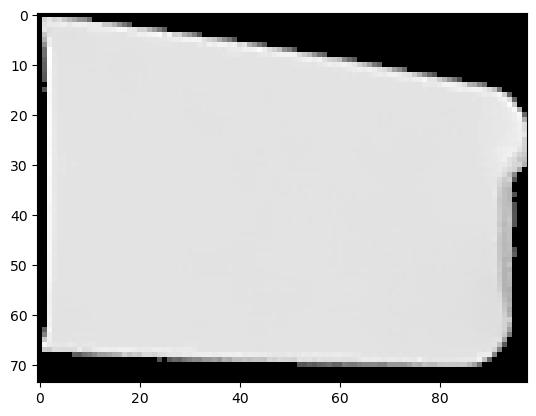

15


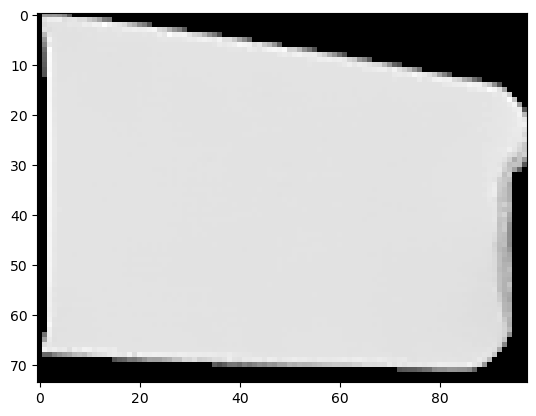

16


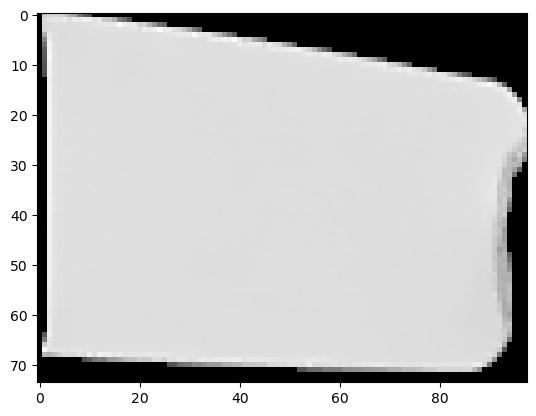

17


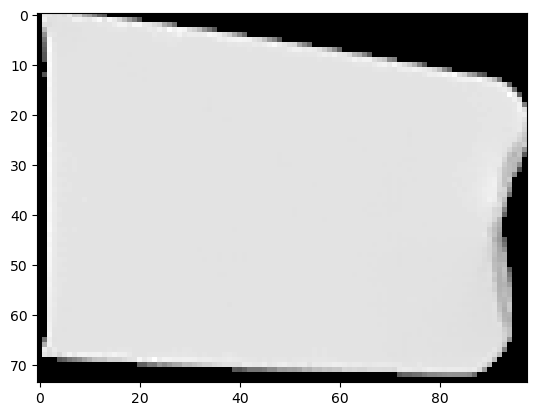

18


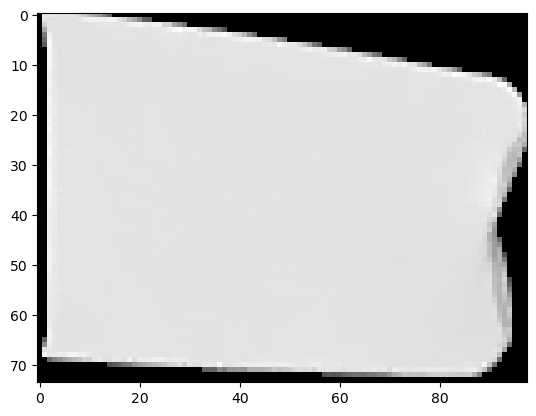

19


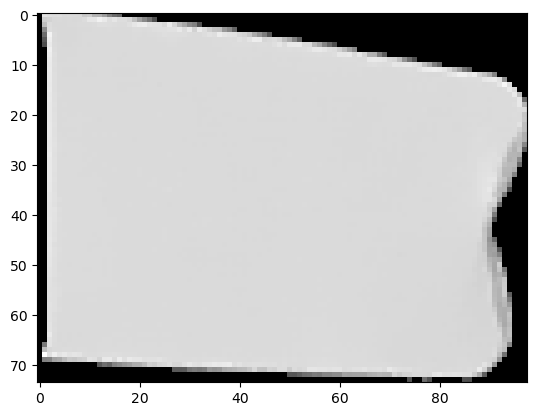

20


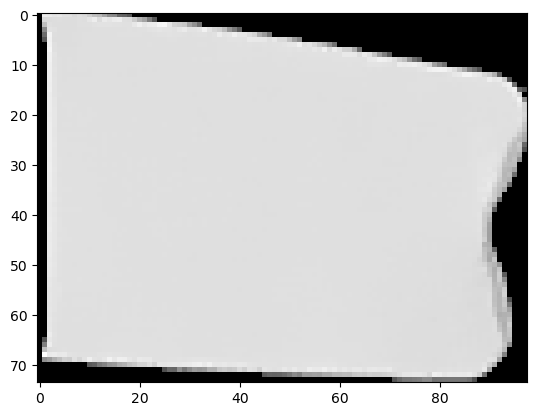

21


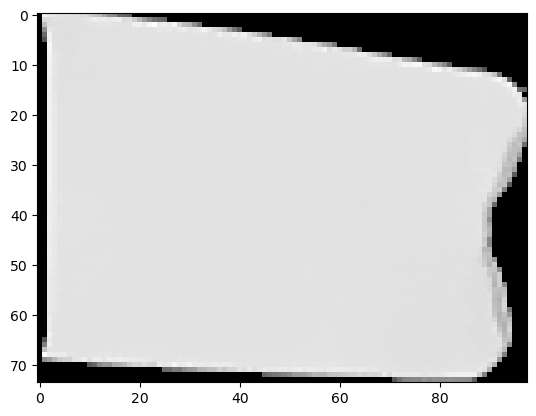

22


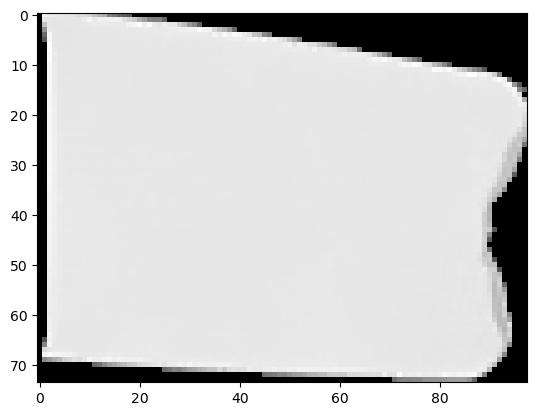

23


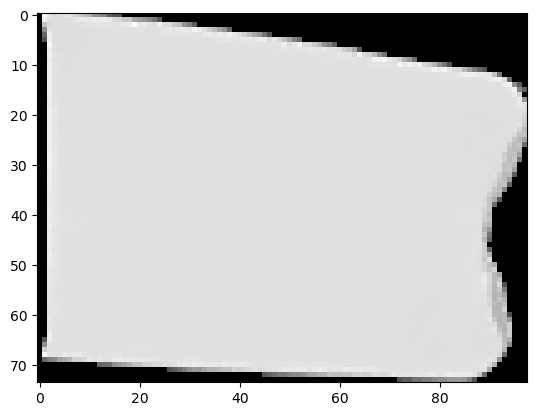

24


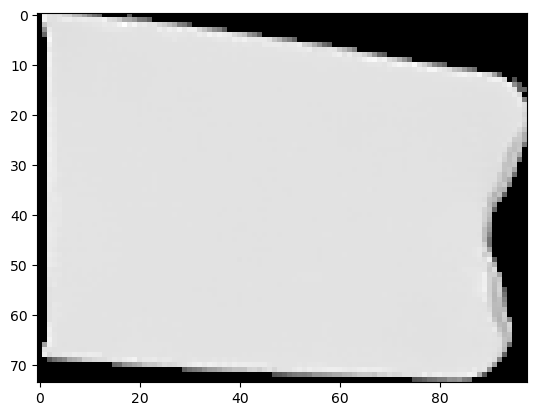

25


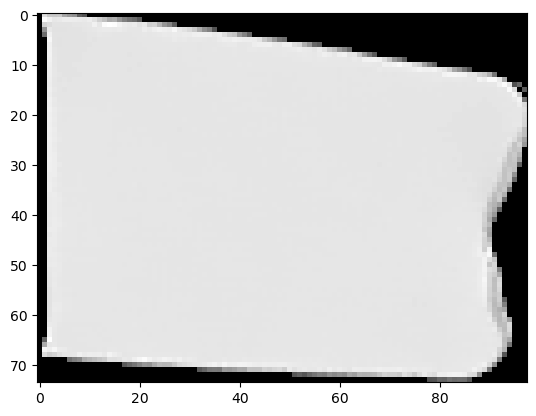

26


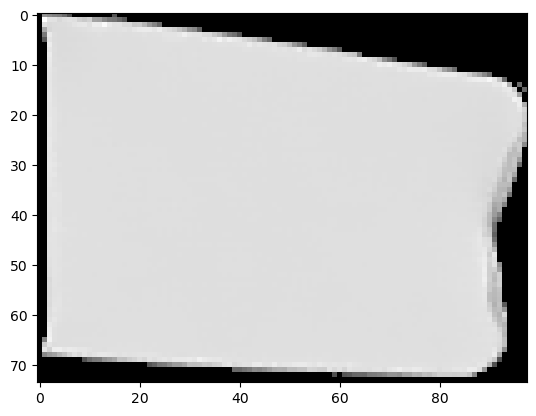

27


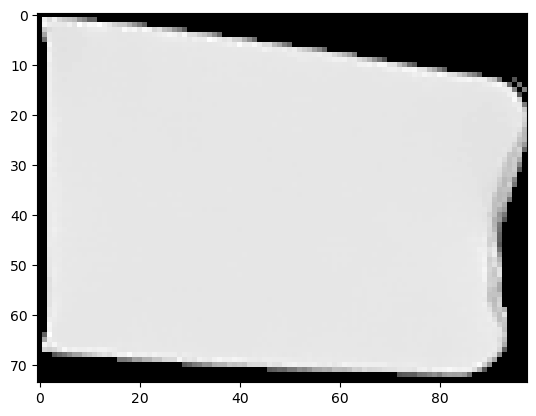

28


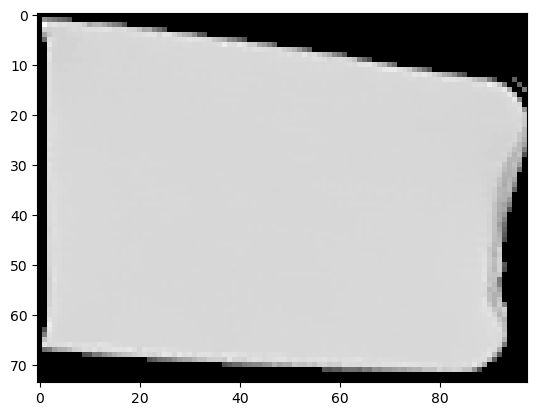

29


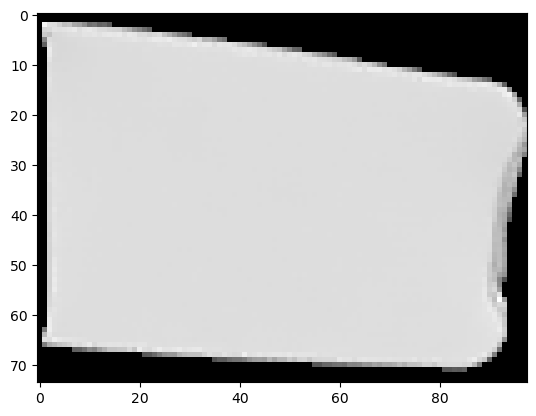

30


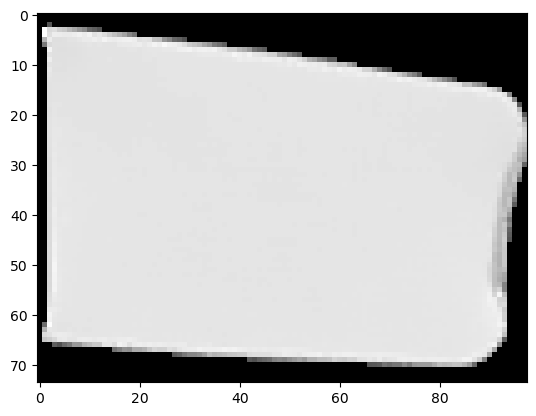

31


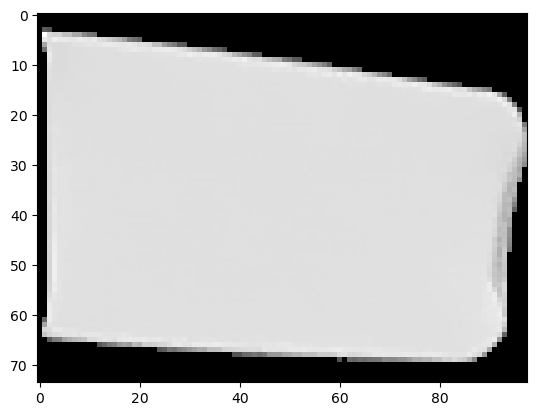

32


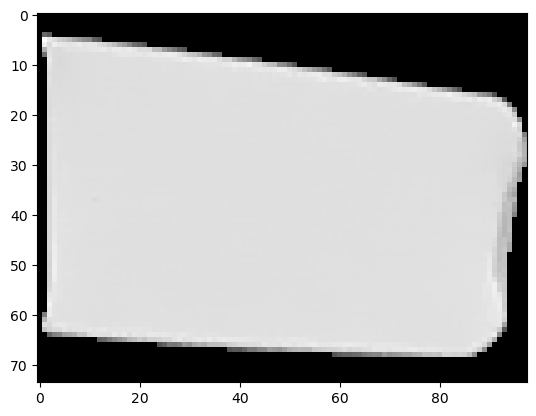

33


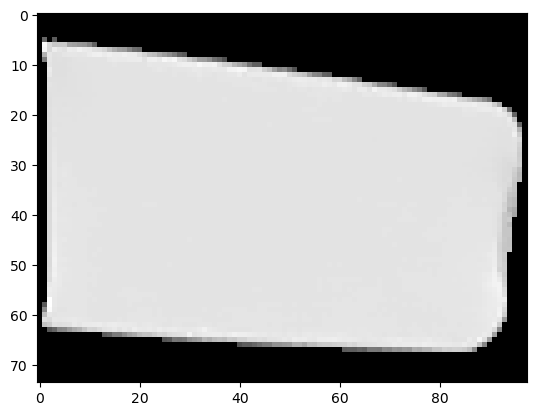

34


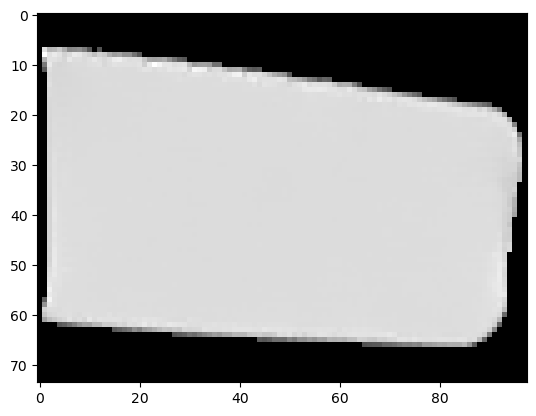

35


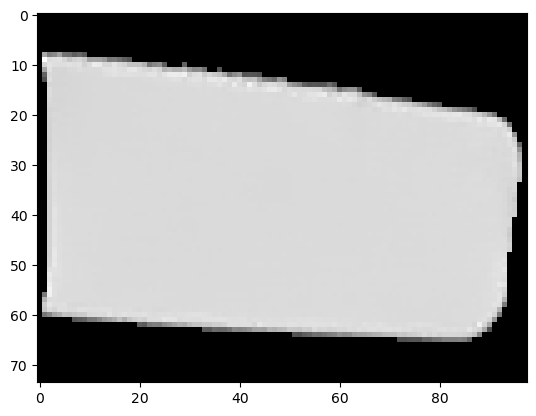

36


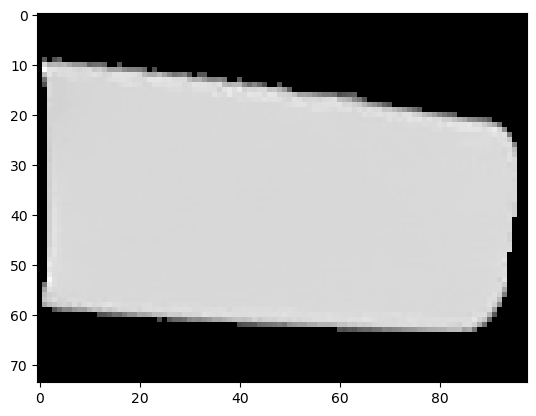

37


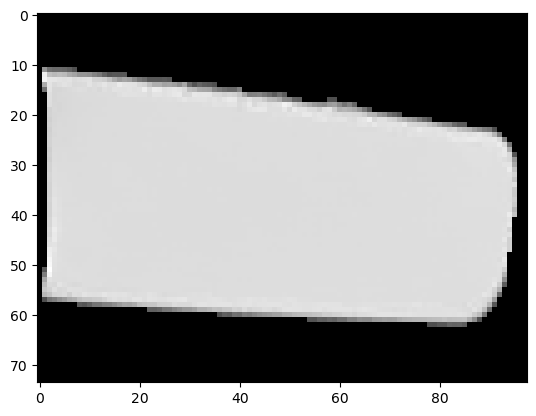

38


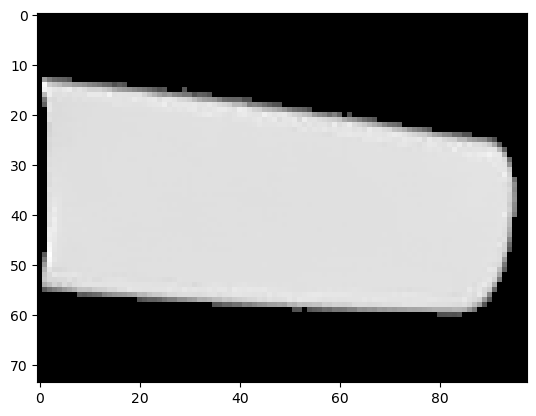

39


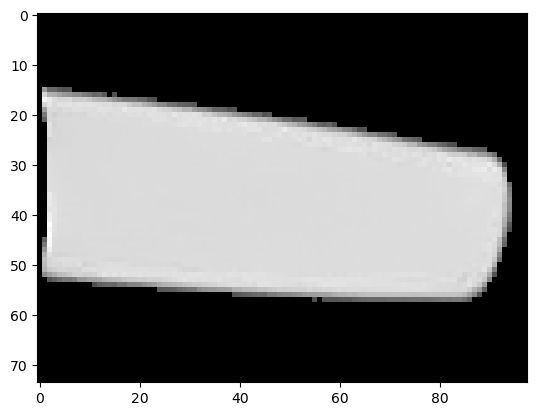

40


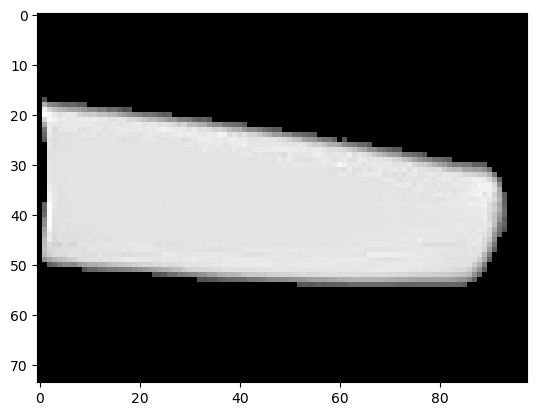

41


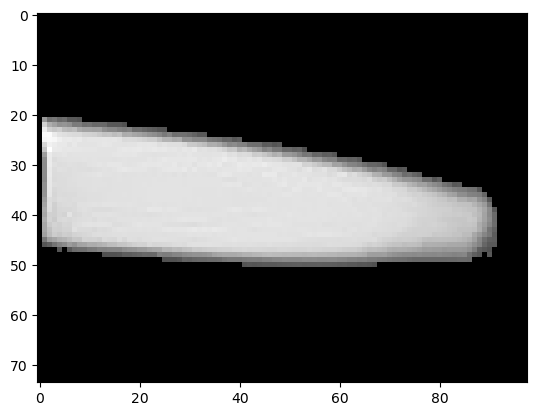

42


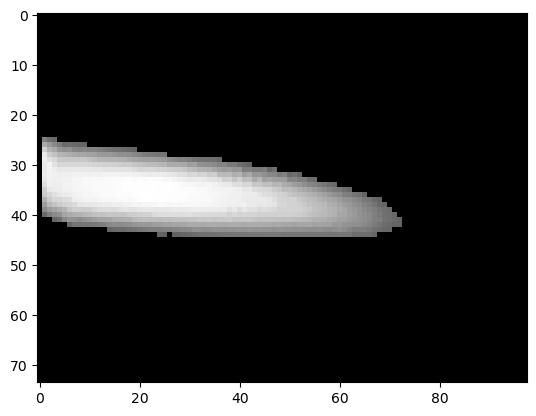

43


In [8]:
if(len(data.shape)==3):
    for slice_Number in range(data.shape[2]):
        plt.imshow(data[:,:,slice_Number],cmap='gray')
        plt.show()
        print(slice_Number)

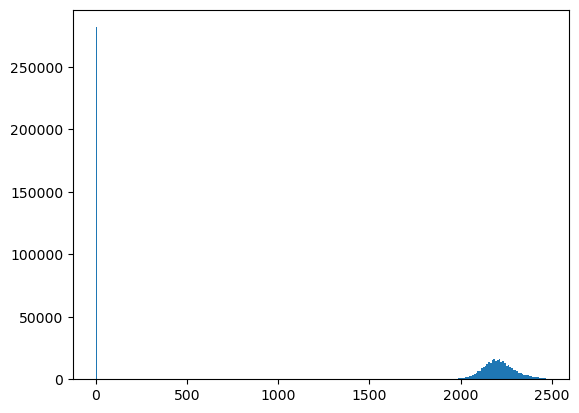

In [8]:
#Histogram of values in the 3D image
plt.hist(np.ravel(data), bins = 255);

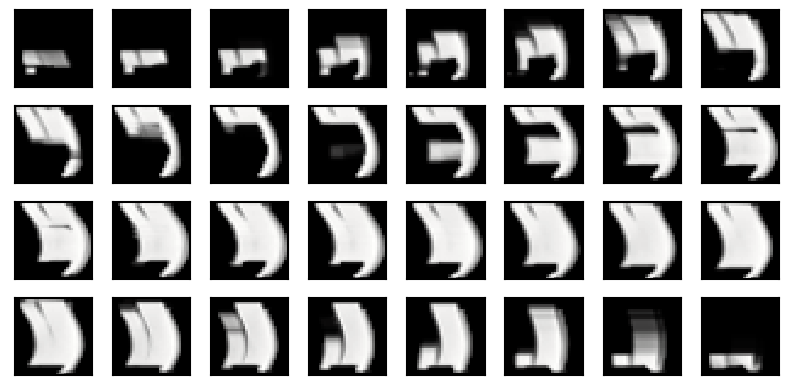

In [23]:
#Import Seaborn_image to view all slices of the image
import seaborn_image as isns
#Function shows all slices of image
def plot_image_slices(image):
    grid = isns.ImageGrid(image,cbar=False,height=1,col_wrap=8,cmap='gray')
    return grid

#Resizes image to row dimensions, column dimensions, and number of slices to show
def resize_image(image,rowdim,coldim,nslices):
    resized = resize(image,(rowdim,coldim,nslices))
    return resized

resized = plot_image_slices(resize_image(data,32,32,32))
resized

2.0


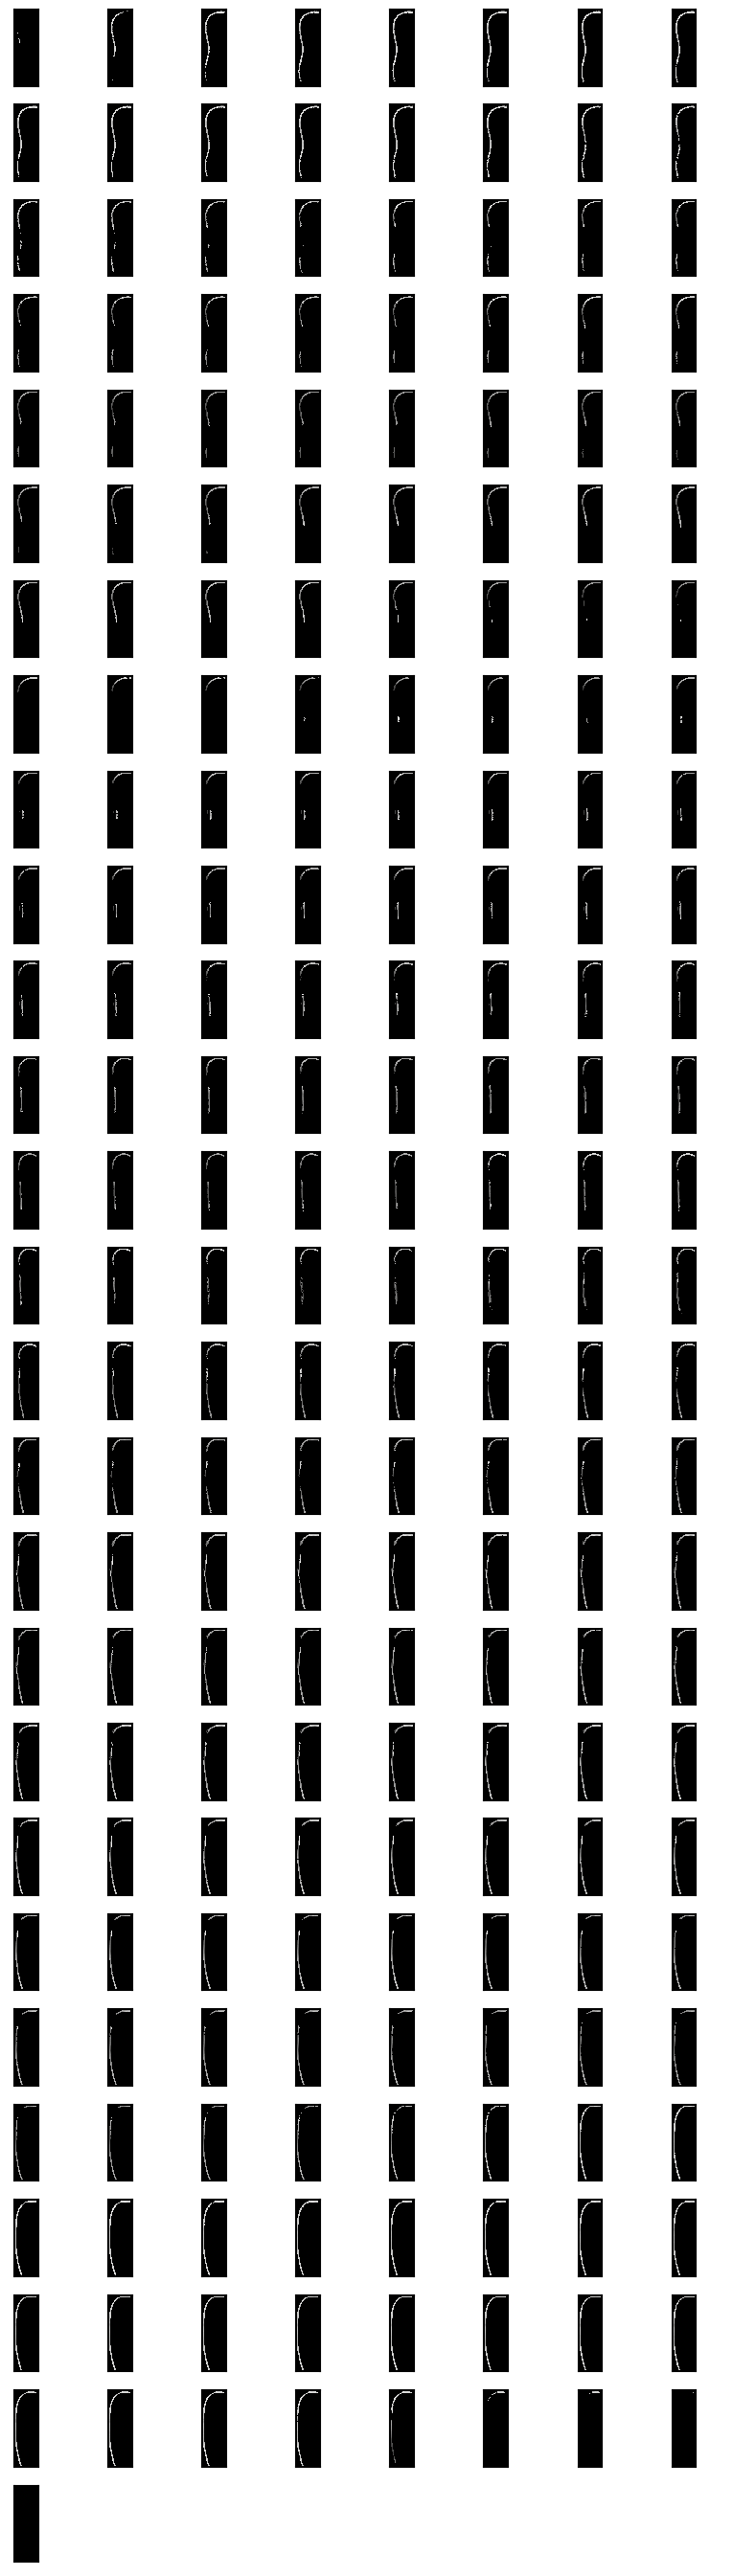

In [42]:
def show_slice_label(image_n):
    image = df['Image'][image_n].get_fdata()
    original = plot_image_slices(image)
    print(df['Label'][image_n])
    return original

show_slice_label(73)

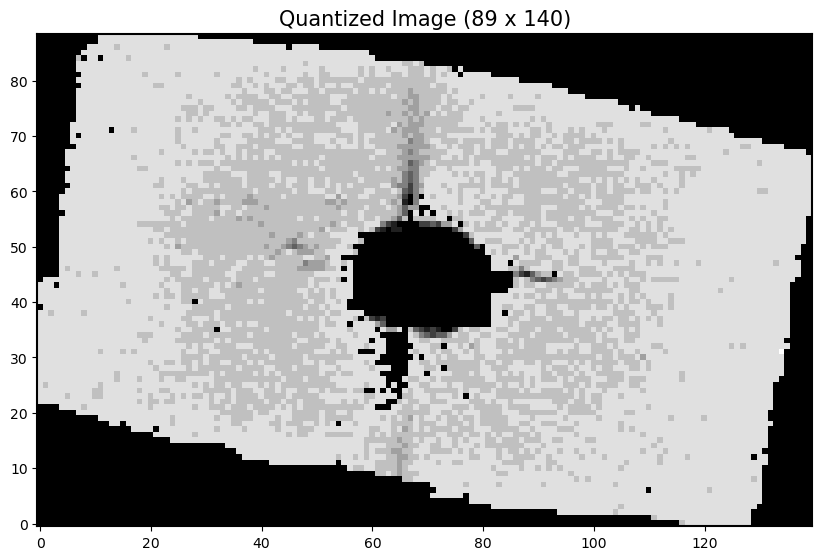

In [11]:
def quantize_image(data, n_levels):
    steps = np.max(data) / n_levels
    if steps == 0: 
        steps = 1
    return (data / steps).astype(int)

quan_slice = quantize_image(first_img_25,8)
fig, ax4 = plt.subplots(figsize=(10,10))
ax4.imshow(quan_slice, cmap='gray')
ax4.set_title('Quantized Image (89 x 140)')

quan = quantize_image(data,8)

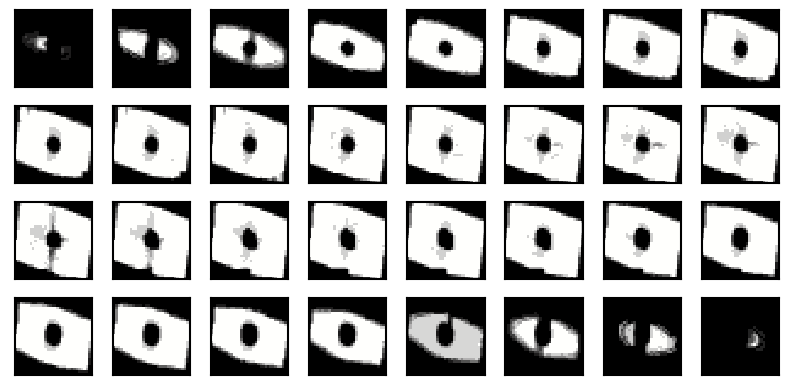

In [12]:
#Now we can plot all of the resized, quantized slices 
quan = quantize_image(data,8)
resized_quan = quantize_image(resize_image(data,32,32,32),8)
plot_image_slices(resized_quan)

(array([2.81701e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 7.00000e+00,
        2.00000e+01, 2.50000e+01, 2.30000e+01, 2.80000e+01, 2.00000e+01,
        2.30000e+01, 3.10000e+01, 2.30000e+01, 3.00000e+01, 2.10000e+01,
        3.20000e+01, 2.50000e+01, 2.70000e+01, 3.70000e+01, 2.60000e+01,
        4.10000e+01, 2.90000e+01, 3.90000e+01, 3.30000e+01, 4.00000e+01,
        3.20000e+01, 2.50000e+01, 3.90000e+01, 4.80000e+01, 5.20000e+01,
        4.10000e+01, 3.20000e+01, 3.60000e+01, 4.80

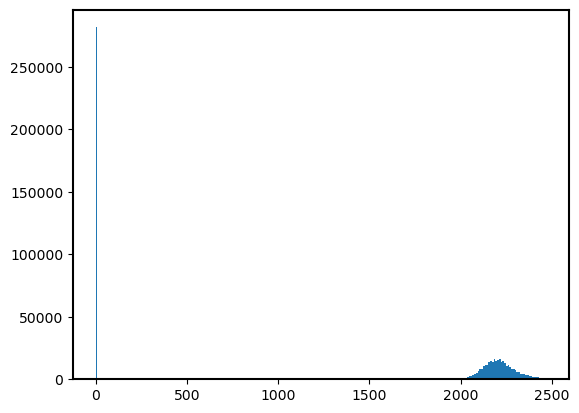

In [13]:
plt.hist(np.ravel(data), bins=256)


In [20]:
#https://www.researchgate.net/publication/339680820_Automatic_Target_Recognition_for_CT-based_Airport_Screening_System

import time

start = time.time()
features_dim = []

for i, img in enumerate(df.Image):
    if i % 100 == 0 and i != 0: print('i=',i,'\ttime=',time.time()-start)
    data = img.get_fdata()
    nonzero = data[np.nonzero(data)]
    x,y,z = img.shape
    
    max_d = np.max(img.shape)
    mid_d = np.median(img.shape)
    min_dim = np.min(img.shape)
    
    histogram = nd.histogram(nonzero,0,2700,4)
    mean = nd.mean(nonzero)
    median = nd.median(nonzero)
    maximum = np.max(nonzero)
    
    std = nd.standard_deviation(nonzero)
    var = nd.variance(nonzero)
    
    skew = stats.skew(nonzero,axis=None)
    kurtosis = stats.kurtosis(nonzero,axis=None)
    entropy = stats.entropy(histogram)
    
    
    
    features_dim.append([x,y,z])
np.save('features_dim.npy', np.array(features_dim))  
print('Done with {:d} rows. Total time = {:<10.3g}'.format(len(df),time.time()-start))

i= 100 	time= 9.09700608253479
i= 200 	time= 21.542191743850708
i= 300 	time= 31.729526042938232
i= 400 	time= 40.07115197181702
i= 500 	time= 52.76129102706909
i= 600 	time= 60.64588761329651
i= 700 	time= 69.11557102203369
i= 800 	time= 76.72509479522705
i= 900 	time= 83.21138739585876
i= 1000 	time= 90.1880292892456
i= 1100 	time= 101.10559964179993


MemoryError: Unable to allocate 16.1 MiB for an array with shape (187, 100, 113) and data type float64

(array([1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

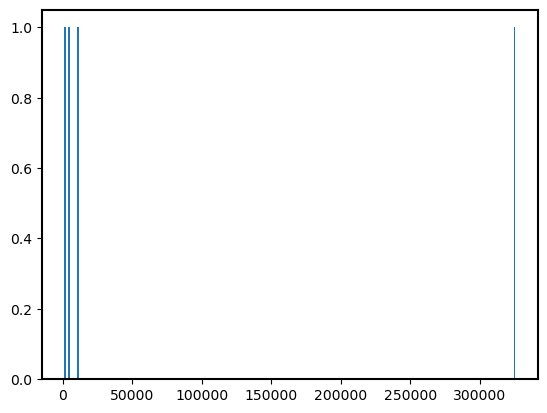

In [14]:
nonzero = data[np.nonzero(data)]
histogram = nd.histogram(nonzero,0,2700,4)
plt.hist(np.ravel(histogram), bins = 255)

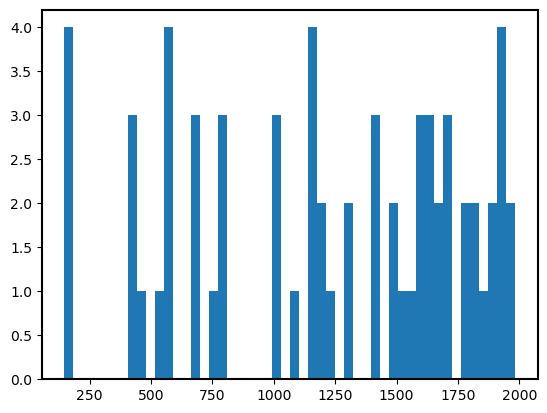

In [15]:
data = df['Image'][0].get_fdata()
resized_data = resize(data,(4,4,4))

plt.hist(np.ravel(resized_data), bins = 50);

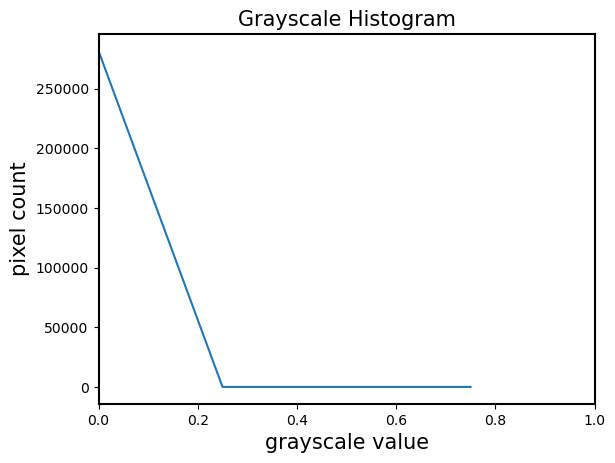

In [21]:
histogram, bin_edges = np.histogram(data, bins=4,range = (0,1))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0,1.0])
plt.plot(bin_edges[0:-1],histogram)

In [22]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)
gmm = gmm.fit(histogram)

ValueError: Expected 2D array, got 1D array instead:
array=[281701.      0.      0.      0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.